# A Look into the LEC 2019 Regular Season

Video games, once nothing more than an enjoyable pasttime, has evolved into something so much more. E-sports is the competitive scene of video games and it is now a billion dollar industry. When it comes to e-sports, League of Legends is by far in the lead, with the most concurrent viewers and professional leagues across the world. Last year, its World Championship had a prize pool of 2 million, and the finals were held at the AccorHotels Arena in Paris with a live audience of 20,000.

Today we'll be having a look at some data of the European league, formally known as the League of Legends European Championship. They are widely considered the 2nd best league internationally, making it to the finals in both the 2018 and 2019 World Championships.

Similar to how data analytics is being used in traditional sports such as baseball and basketball, the same is also true for League of Legends. In baseball for example, the players agree that stats such as OPS (On-base + slugging), On base %, Runs Batted In (RBI), and batting average are good metrics to evaluate players by. Taking basketball as another example, stats such as rebounds, field goal%, free throw %, blocks, and steals are helpful in evaluating players. Here we'll be doing the same for League of Legends and determining which individual player stats translate best into winning games.

# Casually Explained: League of Legends

League of Legends is a multiplayer online battle arena (MOBA) type team game with 5 players on each team. Each team has a base structure called a nexus, and the game is won when one team's nexus is destroyed. 

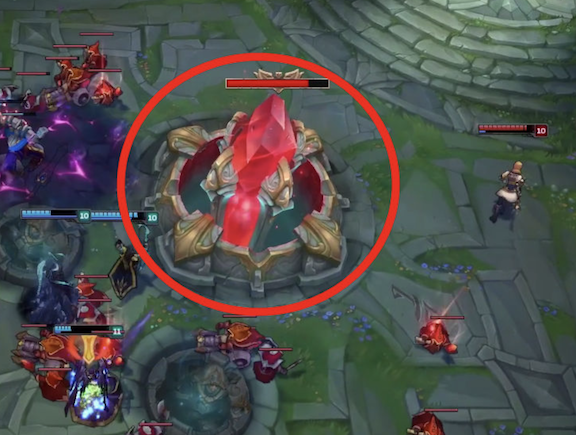

Players can select different characters to play as every game, known as champions. Every player gets stronger by buying equipment in the shop using gold. Gold is earned by either killing other players in the game, or by killing other enemies known as minions. 

The map of League of legends is divided into 3 paths called lanes. Each lane has a line of defenses known as towers. Towers are powerful but can destroyed with the help of ally minions and your fellow players.

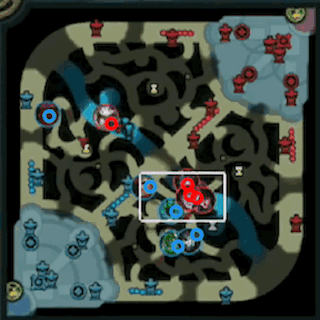

Here depicted is a minimap of the game. As you can see by the little icons, each player on every team is divided across the map to defend their territory. Each lane has 3 towers to defend, and minion waves spawn out of base periodically into each lane to help the champions.

Now that the rules and structure of the game have been explained, you might be asking, "how does one team prevail over the other team and ultimately make it into their base to destroy their nexus?" In general, the team that's earned more gold and therefore have stronger equipment on their champions, will overall be stronger. Midway through the game, the players of the game will start grouping together to start destroying towers together. The enemy team in response will also naturally group together to defend. This is when 5v5 "teamfights" start to happen, and usually the stronger team with more equipment will win the fight. Not only does the winning team of a teamfight earn more gold, but they will be able to freely take the enemy team's towers while the temporarily dead members are unable to defend. This carries on, until eventually the team that's in the lead will be able close out the game and destroy the enemy team's nexus.

Let's start looking at some player data and explaining some of the stats as we go.

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns

In [2]:
champions = pd.read_csv("lec_championdata.csv")
matches = pd.read_csv("lec_matchdata.csv")
players = pd.read_csv("lec_playerdata.csv")

champions = champions.drop(columns=['Unnamed: 0', ' 0'])
matches = matches.drop(columns=['Unnamed: 0'])
players = players.drop(columns=['Unnamed: 0'])

For starters lets see if we can just run a quick and dirty .corr() on the player table to see if we can find any major
correlations in regards to W%, which stands for winrate.

In [3]:
players.corr()['W%']

GP        0.135769
W%        1.000000
K         0.273513
D         0.007244
A         0.311461
KDA       0.576793
KP        0.103335
DTH%     -0.058104
FB%       0.173887
GD10      0.372718
XPD10     0.319711
CSD10     0.095387
CSPM      0.046635
CS%P15   -0.013913
DPM       0.200403
DMG%     -0.019635
EGPM      0.329928
Gold%     0.000781
WPM      -0.021610
WCPM      0.055666
Name: W%, dtype: float64

Lets take some of the more reasonably correlated features and go from there. Looking at any coefficient higher than 0.3, we come up with KDA, GD10, XPD10, and EGPM. These respectively stand for Kills/Deaths/Assists, Gold Difference @10mins, Exp Difference @10 mins, and average Earned Gold Per Minute. For simplicity's sake, we'll only look at the metric with the highest correlation, KDA, further in depth.

# Kills/Deaths/Assists (KDA)

Kills/Death/Assists should be rather straightforward, it's an aggregate of the total amount of times a player has killed an enemy player, died, and assisted in a kill. KDA as a whole is calculated with (Kills + Assists) / Deaths. Naturally the team that's been winning teamfights or has more isolated 1 on 1 kills are highly likely to translate that into a win. Here is an example picture of a scoreboard of a game just before it's over. Each team has their own side of the scoreboard, with each row corresponding to a player of the team:

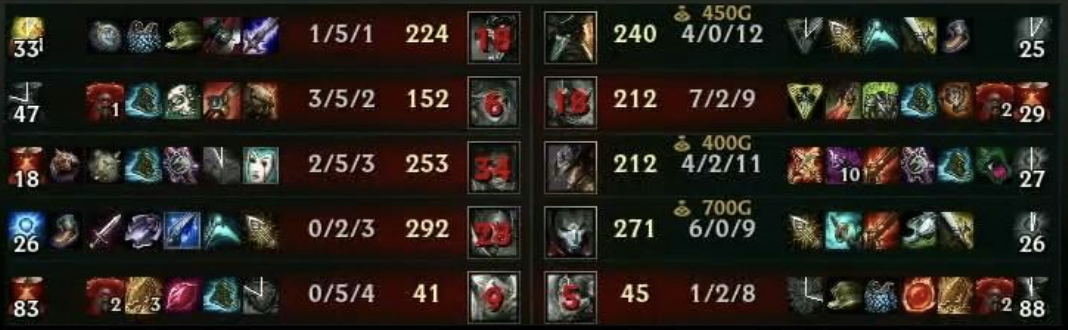

Remembering that the order is in Kills/Deaths/Assists, you should be able to tell which team is the one that's about to lose. A good KDA is highly correlated with winning the game, as it's an indicator that that player is on the team that has been winning teamfights all game. Lets look at the players with the highest KDA.

In [4]:
players.sort_values(by='KDA', ascending=False).head(15)[['Player', 'Team', 'KDA']]

Player        Team   KDA
210  Nemesis      Fnatic  40.0
84     Perkz  G2 Esports  18.0
64      Caps  G2 Esports  17.0
203   Broxah      Fnatic  14.3
83     Perkz  G2 Esports  12.8
147  Nemesis      Fnatic  11.0
24   Jiizuké    Vitality  10.0
75     Mikyx  G2 Esports  10.0
157  Rekkles      Fnatic   9.1
121    IgNar  Schalke 04   8.5
51     Upset  Schalke 04   8.1
97     Bwipo      Fnatic   8.0
70    Jankos  G2 Esports   8.0
154    Perkz  G2 Esports   7.5
27     Kobbe      Splyce   7.3

To an outsider, it would seem reasonable to conclude that the teams known as G2 Esports and Fnatic are the best teams in the league. This is actually factual, G2 and Fnatic have been the undisputed best two teams in Europe for years. Just to confirm it from the data, let's pull up some team stats.

In [5]:
matches.groupby('Team1').sum().sort_values(by="Result", ascending=False)['Result']

Team1
G2 Esports        14
Fnatic            12
SK Gaming         12
Origen             9
FC Schalke 04      8
Team Vitality      7
Splyce             6
Rogue              5
Excel Esports      4
Misfits Gaming     4
Name: Result, dtype: int64

Loosely speaking, a professional League of Legends player's ability to earn kills is about as standard and comparable 
to a basketball player's ability to land shots, or a baseball player's batting accuracy. It's one of the most essential skills a LoL player is expected to have, and largely determines their value as a player.

# Conclusion

Data analytics in sports is a very powerful tool, and has allowed the profession to take their training and coaching to the next level. The same is absolutely true for e-sports too, and due to digitized nature of video games, there is even more potential for more complete data collection and analysis. It is exciting to imagine the potential development of data analytics in e-sports, and how players can take advantage of this to continuously improve.